In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
import numpy as numpy
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from PIL import Image
from zipfile import ZipFile
from sklearn.model_selection import train_test_split
import cv2
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import load_model

In [ ]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [ ]:
with ZipFile('/content/drive/MyDrive/watermark dataset/dataset-watermark.zip','r') as file:
  file.extractall('/content/drive/MyDrive/watermark dataset/dataset-watermark')

In [6]:
datagen=tf.keras.preprocessing.image.ImageDataGenerator(
    zca_epsilon=1e-06,
    rotation_range=0.3,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=None,
    shear_range=0.1,
    zoom_range=0.2,
    channel_shift_range=0.5,
    fill_mode='nearest',
    cval=0.0,
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1/255.0
)

In [15]:
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.3) # set validation split

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/watermark dataset/dataset-watermark/final dataset',
    target_size=(128,128),
    class_mode='binary',
    subset='training')

testing_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/watermark dataset/dataset-watermark/final dataset', # same directory as training data
    target_size=(128,128),
    batch_size=32,
    class_mode='binary',
    subset='validation')

Found 71187 images belonging to 2 classes.
Found 30507 images belonging to 2 classes.


In [ ]:
# x_train,x_test,y_train,y_test=train_test_split(IMAGES,Labels,test_size=0.2)
# x_train,x_test,y_train,y_test=Images[:2400]+Images[3000:5400],Images[2400:3000]+Images[5400:6000],Labels[:2400]+Labels[3000:5400],Labels[2400:3000]+Labels[5400:6000]

In [ ]:
# X = np.asarray(Rescaled_x_train).astype(np.float32)
# x_test= np.asarray(Rescaled__x_test).astype(np.float32)
# Y=np.asarray(y_train).astype(np.float32)
# y_test=np.asarray(y_test).astype(np.float32)

In [17]:
InceptionResNetV2_Model = tf.keras.applications.InceptionResNetV2 (input_shape=(128,128,3),include_top=False, pooling='max', weights='imagenet')

In [18]:
for layer in InceptionResNetV2_Model.layers:
  layer.trainable = False
x = tf.keras.layers.Flatten()(InceptionResNetV2_Model.get_layer("mixed_7a").output) 
x = tf.keras.layers.Dropout(0.25)(x) 
x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense  (1, activation='sigmoid')(x)           
Model = tf.keras.Model([InceptionResNetV2_Model.input], [x]) 

In [19]:
Model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy', # 'mse' | 'sparse_categorical_crossentropy'
              metrics = ['accuracy'])  # 'mae'

In [21]:
history = Model.fit_generator(
    train_generator, 
    steps_per_epoch =100,
    epochs = 10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


Epoch 1/10
100/100 [==============================] - 975s 10s/step - loss: 0.4515 - accuracy: 0.7991
Epoch 2/10
100/100 [==============================] - 934s 9s/step - loss: 0.3591 - accuracy: 0.8509
Epoch 3/10
100/100 [==============================] - 887s 9s/step - loss: 0.3389 - accuracy: 0.8594
Epoch 4/10
100/100 [==============================] - 861s 9s/step - loss: 0.3281 - accuracy: 0.8662
Epoch 5/10
100/100 [==============================] - 816s 8s/step - loss: 0.3094 - accuracy: 0.8806
Epoch 6/10
100/100 [==============================] - 818s 8s/step - loss: 0.2945 - accuracy: 0.8831
Epoch 7/10
100/100 [==============================] - 782s 8s/step - loss: 0.3041 - accuracy: 0.8778
Epoch 8/10
100/100 [==============================] - 788s 8s/step - loss: 0.2921 - accuracy: 0.8809
Epoch 9/10
100/100 [==============================] - 760s 8s/step - loss: 0.3005 - accuracy: 0.8809
Epoch 10/10
100/100 [==============================] - 718s 7s/step - loss: 0.2848 - accur

In [50]:
Model.evaluate(testing_generator)

  9/954 [..............................] - ETA: 44:50 - loss: 0.2796 - accuracy: 0.8854

KeyboardInterrupt: ignored

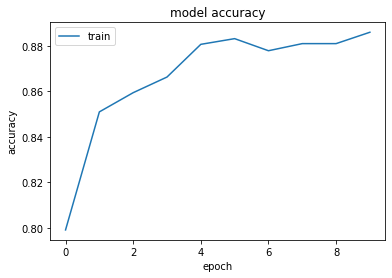

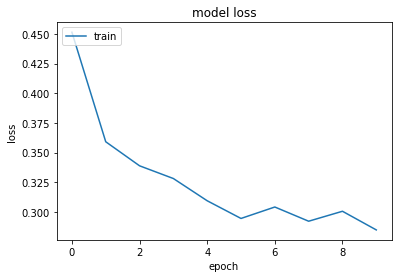

In [23]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
#plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [25]:
Model.save('NEW_ResNetv2.h5')

In [31]:
Loaded_model=load_model('NEW_ResNetv2.h5')

In [32]:
image=cv2.imread('1.jpg')
image=cv2.resize(image,(128,128))
image.shape

(128, 128, 3)

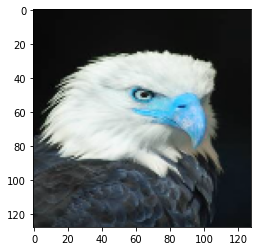

In [33]:
plt.imshow(image)

In [34]:
Loaded_model.predict(image.reshape(1,128,128,3))

array([[0.]], dtype=float32)

In [ ]:
image=cv2.imread('5.jpeg')
image=cv2.resize(image,(128,128))
print(Loaded_model.predict(image.reshape(1,128,128,3)))
plt.imshow(image)

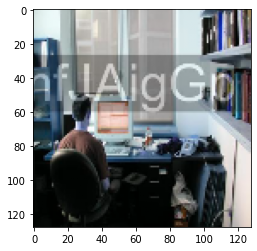

In [47]:
image=cv2.imread('/content/drive/MyDrive/watermark dataset/dataset-watermark/final dataset/wat/20.jpg')
image=cv2.resize(image,(128,128))
image=image/255.0
plt.imshow(image)

In [49]:
np.round(Loaded_model.predict(image.reshape(1,128,128,3)))

array([[1.]], dtype=float32)